In [3]:
#Resizes depth files because SOMEONE forgot to change the resolution of the camera between runs.

import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os

filename_source = 'BCS_aligned_sorted'
filename_destination = 'BCS_aligned_sorted_resized'
filenames_total = glob.glob(filename_source+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)
#print(filenames)


for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass


for image_name in filenames_depth:
    if image_name.endswith('_D.tif'):
        img = imageio.imread(image_name)
        if np.shape(img)[1] == 640:
            imageio.imwrite(str(image_name).replace(filename_source, filename_destination), img, 'TIFF')
        if np.shape(img)[1] == 848:
            new_img = img[:, 104:-104]
            imageio.imwrite(str(image_name).replace(filename_source, filename_destination), new_img, 'TIFF')
            

for image_name in filenames_color: 
    if image_name.endswith('_C.tif'):
        img = imageio.imread(image_name)
        #img_HSI = skimage.color.rgb2hsv(img)
        #imageio.imwrite(str(image_name).replace(filename_source, 'BCS_sorted_resized'), img_HSI, 'TIFF')
        imageio.imwrite(str(image_name).replace(filename_source, filename_destination), img, 'TIFF')
 

# temp_max_vec = [0, 0, 0, 0, 0, 0]
# temp_max = 0
# for img_name in filenames:
#     if img_name.endswith('_D.tif'):
#         temp_max = np.max(imageio.imread(img_name))
#     if (temp_max >= temp_max_vec[0]) and (temp_max < 10000):
#         temp_max_vec[5] = temp_max_vec[4]
#         temp_max_vec[4] = temp_max_vec[3]
#         temp_max_vec[3] = temp_max_vec[2]
#         temp_max_vec[2] = temp_max_vec[1]
#         temp_max_vec[1] = temp_max_vec[0]
#         temp_max_vec[0] = temp_max

# print(temp_max_vec)

KeyboardInterrupt: 

In [5]:
import skimage.color
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os
from astropy.io import fits

def image_preprocessing(filepath):
    img = imageio.imread(filepath)
    background = imageio.imread("masks\\background.tif")
    img = background - img

    otsu_thresh = skimage.filters.threshold_otsu(img)
    img_post = np.where(img<otsu_thresh, img, 0)

    img_post = np.where(img_post>600, img, 0)

    img_mask = np.where(img_post != 0, 1, 0)
    img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
    assert( img_seg.max() != 0 )
    mask = img_seg == np.argmax(np.bincount(img_seg.flat)[1:])+1

    depth_img = np.where(mask != 0, img, 0)

    return depth_img, mask

In [12]:
filename_source = 'BCS_aligned_sorted'
filename_destination = 'BCS_aligned_sorted_HDV'

for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass

    


filename = 'BCS_aligned_sorted'
destination = 'BCS_aligned_sorted_HDV'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)



for i in range(0, len(filenames_color)):
    for j in range(i, len(filenames_depth)):
        if (os.path.basename(filenames_color[i][:-len('_C.tif')-1])==os.path.basename(filenames_depth[j][:-len('_C.tif')-1])) and (filenames_color[i][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_color[i]))-1]==filenames_depth[j][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_depth[j]))-1]):
            temp_filename = filenames_color[i].replace('BCS_aligned_sorted', destination)
            temp_filename = temp_filename.replace('C.tif', 'HDV.tif')
            img_HSV = imageio.imread(filenames_color[i])
            # try:
            img_depth, mask = image_preprocessing(filenames_depth[j])
                # img_depth = imageio.imread(filenames_depth[j])
                # img_depth[img_depth>2500] = 2500
                #print(np.max(img_depth))
            img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
            # except:
            #     print(filenames_depth[j])
            #     break
            img_HSV[:, :, 1] = img_depth
            # try:
            #     # os.mkdir(destination+'\\'+filenames_color[i][len('BCS_sorted_resized/'):-len(os.path.basename(filenames_color[i]))-1])
            #     # os.mkdir('BCS_sorted_HDV_fits\\'+filenames_color[i][len('BCS_sorted_resized/'):-len(os.path.basename(filenames_color[i]))-1])
            # except:
            #     pass
            # # hdu = fits.PrimaryHDU((img_HSV*255).astype('uint8'))
            # # hdu.writeto(temp_filename, output_verify='silentfix', overwrite=True)
            # img_depth = skimage.color.gray2rgb(img_depth)
            # imageio.imwrite(temp_filename, img_depth, 'TIFF')
            img_HSV[:, :, 0] = img_HSV[:, :, 0]*mask
            img_HSV[:, :, 1] = img_HSV[:, :, 1]*mask
            img_HSV[:, :, 2] = img_HSV[:, :, 2]*mask
            imageio.imwrite(temp_filename, img_HSV, 'TIFF')
#print(np.max(img_HSV))

In [ ]:
from astropy.io import fits
#fits_image_filename = fits.util.get_testdata_filepath('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits')


image_data = fits.getdata('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits', ext=0)  # assume the first extension is an image


with fits.open('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits') as img: # read in fits image
    img.verify('silentfix')
    img = img[0].data
    plt.imshow(img)

In [15]:
hdu = fits.PrimaryHDU(np.zeros((640, 480, 3)))
hdu.writeto('placeholder.fits', output_verify='silentfix', overwrite=True)

252


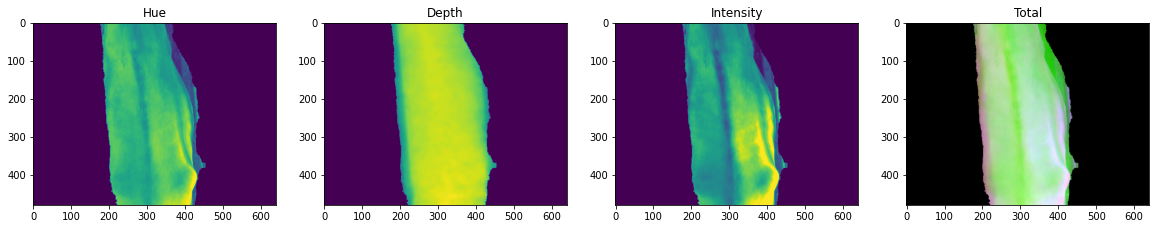

In [15]:
#print(np.max(img_HSV))

img = (imageio.imread('BCS_aligned_sorted_HDV\\2\\Cow_11\\20_HDV.tif')).astype('uint8')

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.imshow(img[:, :, 0])
plt.title('Hue')
plt.subplot(1, 4, 2)
plt.imshow(img[:, :, 1])
plt.title('Depth')
plt.subplot(1, 4, 3)
plt.imshow(img[:, :, 2])
plt.title('Intensity')
plt.subplot(1, 4, 4)
plt.imshow(img)
plt.title('Total')

print(np.max(img[:, :, 0]))
#print(filenames_color[i][len('BCS_sorted_resized/4/'):-len(os.path.basename(filenames_color[i]))-1])

9823
BCS_sorted\2\Cow_11\100_D.tif
['BCS_sorted\\2\\Cow_11\\', 'BCS_sorted\\2\\Cow_11_2\\', 'BCS_sorted\\2\\Cow_46\\', 'BCS_sorted\\2\\Cow_46_1\\', 'BCS_sorted\\2\\Cow_46_2\\', 'BCS_sorted\\2\\Cow_5\\', 'BCS_sorted\\2\\Cow_5_1\\', 'BCS_sorted\\3\\Cow_1\\', 'BCS_sorted\\3\\Cow_12\\', 'BCS_sorted\\3\\Cow_14\\', 'BCS_sorted\\3\\Cow_16_1\\', 'BCS_sorted\\3\\Cow_16_2\\', 'BCS_sorted\\3\\Cow_22_1_other_camera_says_23\\', 'BCS_sorted\\3\\Cow_26\\', 'BCS_sorted\\3\\Cow_4\\', 'BCS_sorted\\3\\Cow_42\\', 'BCS_sorted\\3\\Cow_47_1\\', 'BCS_sorted\\3\\Cow_48\\', 'BCS_sorted\\3\\Cow_4_1\\', 'BCS_sorted\\3\\Cow_53\\', 'BCS_sorted\\4\\Cow_10_1\\', 'BCS_sorted\\4\\Cow_13_1\\', 'BCS_sorted\\4\\Cow_15\\', 'BCS_sorted\\4\\Cow_17_maybe_16\\', 'BCS_sorted\\4\\Cow_19\\', 'BCS_sorted\\4\\Cow_2\\', 'BCS_sorted\\4\\Cow_20\\', 'BCS_sorted\\4\\Cow_21\\', 'BCS_sorted\\4\\Cow_23_1\\', 'BCS_sorted\\4\\Cow_24\\', 'BCS_sorted\\4\\Cow_27\\', 'BCS_sorted\\4\\Cow_27_1\\', 'BCS_sorted\\4\\Cow_29\\', 'BCS_sorted\\4\\Cow_30\

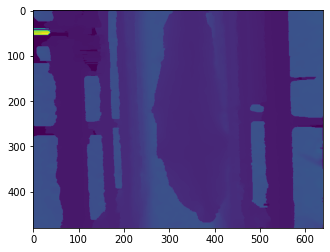

In [ ]:
img = imageio.imread(filenames_total[4001])

plt.imshow(img)
print(np.max(img))
print(filenames_total[1])

print(glob.glob(filename+'*\\*\\*\\'))